# Notebook Setup

## New Metrics Switch

In [1]:
# Boolean flag to signal whether it's necessary to load all of hte results
# and calculate new performance statistics.
# This takes several hours.
CALCULATE_NEW_METRICS = False

# If we calculate new performance statistics, they are saved in this file.
# If we do not calculate new performance statistics, old ones are loaded
# from this file.
pub_stats_filename = 'results/pub_statistics.pkl'


# We also need the time split stats for plotting.
time_split_stats_filename = 'results/time_split_statistics.pkl'

## Imports

In [46]:
import glob
import numpy as np
from pathlib import Path
import pickle as pkl

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from typing import Sequence

# The neuralhydroloy repository must exist in the current working directory.
from neuralhydrology.evaluation import metrics

## Metrics List

In [3]:
# Returns a list of all available performance metrics in NeuralHydrology
metrics_list = metrics.get_available_metrics()
print('The available metrics are:')
metrics_list

The available metrics are:


['NSE',
 'MSE',
 'RMSE',
 'KGE',
 'Alpha-NSE',
 'Pearson-r',
 'Beta-KGE',
 'Beta-NSE',
 'FHV',
 'FMS',
 'FLV',
 'Peak-Timing']

In [4]:
# Remove any metrics that you don't care about. 
# Feel free to change this.
metrics_list.remove('MSE')
metrics_list.remove('RMSE')
metrics_list.remove('FHV')
metrics_list.remove('FMS')
metrics_list.remove('FLV')
metrics_list.remove('Beta-KGE')

print('The metrics that we are going to calculate are:')
metrics_list

The metrics that we are going to calculate are:


['NSE', 'KGE', 'Alpha-NSE', 'Pearson-r', 'Beta-NSE', 'Peak-Timing']

## Basins

In [5]:
basin_file = '531_basin_list.txt'
with Path(basin_file).open('r') as fp:
    basins = sorted(basin.strip() for basin in fp if basin.strip())
print(f"There are {len(basins)} basins.")

There are 531 basins.


## Paths

In [6]:
# Paths to results from different models. 
# Note that these must match what is in the config files.
autoregression_dir = 'runs/pub/autoregression'
assimilation_dir = 'runs/pub/assimilation'
simulation_dir = 'runs/pub/simulation'

In [7]:
# Get paths to all simulation results.
simulation_run_dirs = glob.glob(simulation_dir + '/pub_simulation_*')
for i, run_dir in enumerate(simulation_run_dirs):
    simulation_run_dirs[i] = run_dir.split('/')[-1]
print(f"There are {len(simulation_run_dirs)} simulation runs.")

There are 10 simulation runs.


In [8]:
# Get paths to all assimilation results.
assimilation_run_dirs = glob.glob(assimilation_dir + '/**')
for i, run_dir in enumerate(assimilation_run_dirs):
    assimilation_run_dirs[i] = run_dir.split('/')[-1]
print(f"There are {len(assimilation_run_dirs)} assimilation runs.")

There are 10 assimilation runs.


In [9]:
# Get paths to all autoregression results.
autoregression_run_dirs = glob.glob(autoregression_dir + '/**')
for i, run_dir in enumerate(autoregression_run_dirs):
    autoregression_run_dirs[i] = run_dir.split('/')[-1]
print(f"There are {len(autoregression_run_dirs)} autoregression runs.")

There are 10 autoregression runs.


# Experiment Definition

## Infer Experiment Parameters

In [10]:
ensembles = set()
for run in autoregression_run_dirs:
    ensembles.add(int(run.split('seed_')[-1].split('_')[0]))
ensembles = sorted(list(ensembles))

## Initialize Storage

In [11]:
autoregression_statistics = {}
assimilation_statistics = {}
simulation_statistics = {}

for metric in metrics_list:
    autoregression_statistics[metric] = pd.DataFrame(index=basins, columns=ensembles, dtype=np.float64)
    assimilation_statistics[metric] = pd.DataFrame(index=basins, columns=ensembles, dtype=np.float64)
    simulation_statistics[metric] = pd.DataFrame(index=basins, columns=ensembles, dtype=np.float64)

## Load Obs Data

In [12]:
# Load in the saved metrics. 
# Even if we just calcuated them, might as well make sure the file works.
# You need to change this path manually because of the timestamp. It must
# point to a time_split directory and not to a pub directory, in order to 
# have all of the basins.
with open('runs/time_split/simulation/simulation_seed_0_1304_224615/test/model_epoch030/test_results.p', 'rb') as f:
    data_xr = pkl.load(f)

# Calculate Metrics

## Simulation

In [47]:
if CALCULATE_NEW_METRICS:
    for run in simulation_run_dirs:
        ensemble = int(run.split('seed_')[-1].split('_')[0])

        with open(simdef _plot_cdf(
    scores: np.ndarray, 
    ax: plt.Axes, 
    label: str, 
    xlabel:str, 
    xlim:Sequence[float]=None,
    lw: float=2,
    color: str=None,
    ls: str='-',
):
    
    # Plot the CDF
    y_data = np.array(range(len(scores))) / len(scores)
    x_data = np.sort(np.squeeze(scores))
    if color is not None:
        ax.plot(x_data, y_data, label=label, lw=lw, c=color, ls=ls)
    else:
        ax.plot(x_data, y_data, label=label, lw=lw, ls=ls)

    # Aesthetics
    ax.legend()
    ax.set_ylabel('Fraction of Basins')
    ax.set_xlabel(xlabel)

    if xlim is not None:
        ax.set_xlim(xlim)qdm(run_data):

            sim = run_data[basin]['1D']['xr'].stack(datetime=['date', 'time_step'])['QObs(mm/d)_sim']
            sim['datetime'] = sim.coords['date']# + sim.coords['time_step']
            obs = data_xr[basin]['1D']['xr']['QObs(mm/d)_obs'].stack(datetime=['date', 'time_step'])
            obs['datetime'] = obs.coords['date']# + obs.coords['time_step']
            basin_metrics = metrics.calculate_metrics(obs=obs, sim=sim, metrics=metrics_list)

            for metric in metrics_list:
                simulation_statistics[metric].loc[basin, ensemble] = basin_metrics[metric]

SyntaxError: invalid syntax (2054794168.py, line 5)

In [14]:
simulation_statistics['NSE'].median()

0   NaN
dtype: float64

## Assimilation

In [15]:
if CALCULATE_NEW_METRICS:
    for run in tqdm(assimilation_run_dirs):
        hf = float(run.split('holdout_')[-1].split('_')[0])   
        lead_time = int(run.split('lead_')[-1].split('_')[0])
        ensemble = int(run.split('seed_')[-1].split('_')[0])

        with open(assimilation_dir + '/' + run + '/test/model_epoch030/test_results_data_assimilation.p', 'rb') as f:
            run_data = pkl.load(f)

        for basin in tqdm(run_data):
            sim = run_data[basin]['1D']['xr'].stack(datetime=['date', 'time_step'])['QObs(mm/d)_sim']
            sim['datetime'] = sim.coords['date']# + sim.coords['time_step']
            obs = data_xr[basin]['1D']['xr']['QObs(mm/d)_obs'].stack(datetime=['date', 'time_step'])
            obs['datetime'] = obs.coords['date']# + obs.coords['time_step']
            basin_metrics = metrics.calculate_metrics(obs=obs, sim=sim, metrics=metrics_list)

            for metric in metrics_list:
                assimilation_statistics[metric].loc[basin, ensemble] = basin_metrics[metric]

In [16]:
assimilation_statistics['NSE'].median()

0   NaN
dtype: float64

## Autoregression

In [17]:
if CALCULATE_NEW_METRICS:
    for run in tqdm(autoregression_run_dirs):
        ensemble = int(run.split('seed_')[-1].split('_')[0])

        with open(autoregression_dir + '/' + run + '/test/model_epoch030/test_results.p', 'rb') as f:
            run_data = pkl.load(f)

        for basin in tqdm(run_data):
            sim = run_data[basin]['1D']['xr'].stack(datetime=['date', 'time_step'])['QObs(mm/d)_sim']
            sim['datetime'] = sim.coords['date']# + sim.coords['time_step']
            obs = data_xr[basin]['1D']['xr']['QObs(mm/d)_obs'].stack(datetime=['date', 'time_step'])
            obs['datetime'] = obs.coords['date']# + obs.coords['time_step']
            basin_metrics = metrics.calculate_metrics(obs=obs, sim=sim, metrics=metrics_list)

            for metric in metrics_list:
                autoregression_statistics[metric].loc[basin, ensemble] = basin_metrics[metric]

In [18]:
autoregression_statistics['NSE'].median().dropna()

Series([], dtype: float64)

## Save & Load Precaculated Metrics

In [19]:
# If we calculated new metrics, save these over any old ones that might exist.
if CALCULATE_NEW_METRICS:
    with open(pub_stats_filename, 'wb') as f:
        pkl.dump([
            simulation_statistics,
            autoregression_statistics,
            assimilation_statistics
        ], f)

In [20]:
# Load in the saved metrics. 
# Even if we just calcuated them, might as well make sure the file works.
with open(pub_stats_filename, 'rb') as f:
    pub_sim, pub_ar, pub_da = pkl.load(f)

In [21]:
# Load in the saved metrics. 
# Even if we just calcuated them, might as well make sure the file works.
with open(time_split_stats_filename, 'rb') as f:
    time_sim, time_ar, time_da = pkl.load(f)

# Plotting Utilities

In [61]:
# Function to choose plotting colors (by data split type).
def _model_to_color(model: str) -> str:
    colors = {}
    colors['Basin-Split'] = 'darkviolet'
    colors['Time-Split'] = 'teal'
    if 'Basin-Split' in model:
        return mcolors.CSS4_COLORS[colors['Basin-Split']]
    elif 'Time-Split' in model:
        return mcolors.CSS4_COLORS[colors['Time-Split']]
    else:
        raise ValueError(f'Model string {model} not recognized.')

In [62]:
# Function to choose plotting linestyles (by model type).
def _model_to_linestyle(model: str) -> str:
    ls = {}
    ls['Sim'] = '-'
    ls['AR'] = '--'
    ls['DA'] = ':'
    if 'Sim' in model:
        return ls['Sim']
    elif 'AR' in model:
        return ls['AR']
    elif 'DA' in model:
        return ls['DA']
    else:
        raise ValueError(f'Model string {model} not recognized.')

In [48]:
def _plot_cdf(
    scores: np.ndarray, 
    ax: plt.Axes, 
    label: str, 
    xlabel:str, 
    xlim:Sequence[float]=None,
    lw: float=2,
    color: str=None,
    ls: str='-',
):
    
    # Plot the CDF
    y_data = np.array(range(len(scores))) / len(scores)
    x_data = np.sort(np.squeeze(scores))
    if color is not None:
        ax.plot(x_data, y_data, label=label, lw=lw, c=color, ls=ls)
    else:
        ax.plot(x_data, y_data, label=label, lw=lw, ls=ls)

    # Aesthetics
    ax.legend()
    ax.set_ylabel('Fraction of Basins')
    ax.set_xlabel(xlabel)

    if xlim is not None:
        ax.set_xlim(xlim)

# Figures

## Figure 1

Median NSE scores of PUB and time-split models with a lag of 1 day and no data withheld during inference.

In [23]:
# import matplotlib
# matplotlib.use('TkAgg')

/home/gsnearing/anaconda3/envs/neuralhydrology/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


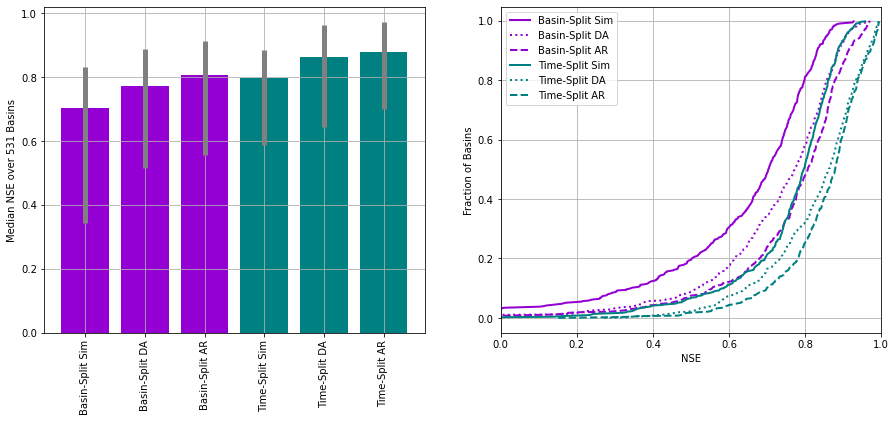

In [63]:
metric = 'NSE'
comparison_index = ['Basin-Split Sim', 'Basin-Split DA', 'Basin-Split AR', 'Time-Split Sim', 'Time-Split DA', 'Time-Split AR']

plotdata = pd.DataFrame(index=basins, columns=comparison_index)
plotdata['Basin-Split Sim'] = pub_sim[metric]
plotdata['Basin-Split DA'] = pub_da[metric]
plotdata['Basin-Split AR'] = pub_ar[metric]
plotdata['Time-Split Sim'] = time_sim[metric]
plotdata['Time-Split DA'] = time_da[metric][(0.00, 1, 0)]
plotdata['Time-Split AR'] = time_ar[metric][(0.00, 0.00, 1, 0)]

color_mapping = [_model_to_color(model) for model in comparison_index]

fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].bar(plotdata.columns, plotdata.median().values, color=color_mapping)
axes[0].vlines(plotdata.columns, plotdata.quantile(0.10), plotdata.quantile(0.90), color='grey', lw=5)
axes[0].grid()
axes[0].set_ylabel(f'Median {metric} over 531 Basins')
axes[0].set_xticklabels(plotdata.columns, rotation=90)

for col in plotdata.columns:
    _plot_cdf(scores=plotdata[col], ax=axes[1], label=col, 
    xlabel=metric, xlim=[0,1], color=_model_to_color(col), ls=_model_to_linestyle(col))
axes[1].grid()
axes[1].set_ylabel(f'Fraction of Basins')

plot_file_name = f"./results/plots/figure4_pub_nse.png"
plt.savefig(plot_file_name)

## All Metrics

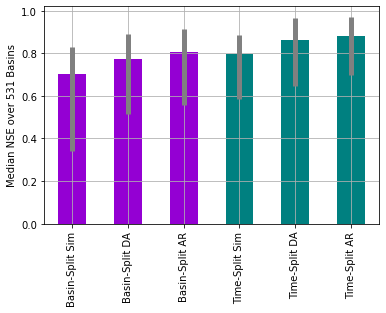

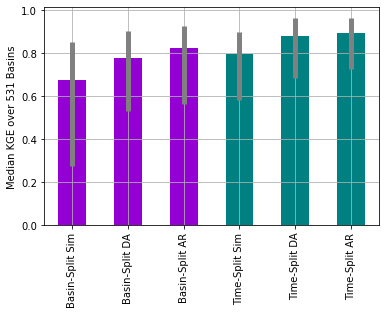

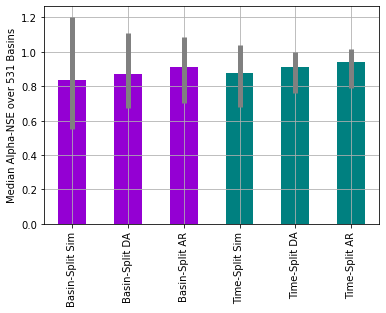

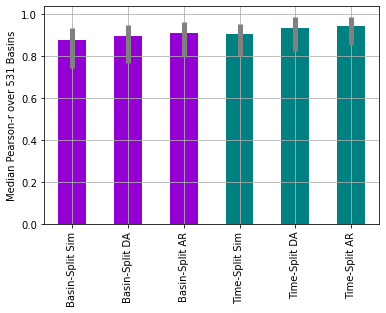

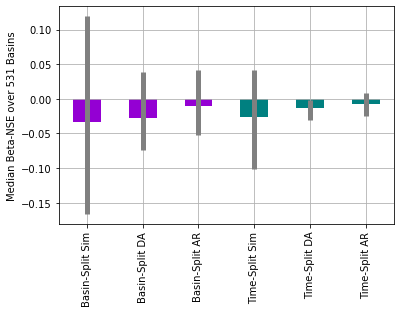

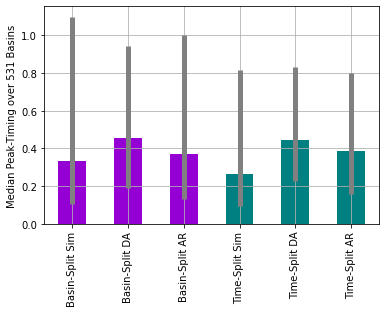

In [52]:
comparison_index = ['Basin-Split Sim', 'Basin-Split DA', 'Basin-Split AR', 'Time-Split Sim', 'Time-Split DA', 'Time-Split AR']

for metric in metrics_list:

    fig = plt.figure()
    
    plotdata = pd.DataFrame(index=basins, columns=comparison_index)
    plotdata['Basin-Split Sim'] = pub_sim[metric]
    plotdata['Basin-Split DA'] = pub_da[metric]
    plotdata['Basin-Split AR'] = pub_ar[metric]
    plotdata['Time-Split Sim'] = time_sim[metric]
    plotdata['Time-Split DA'] = time_da[metric][(0.00, 1, 0)]
    plotdata['Time-Split AR'] = time_ar[metric][(0.00, 0.00, 1, 0)]
    plotdata.median()

    color_mapping = [_model_to_color(model) for model in comparison_index]
    plotdata.median().plot.bar(color=color_mapping)
    # plt.errorbar(plotdata.columns, plotdata.median(), yerr=plotdata.std(), fmt='.', c='k', label='1 \sigma')
    plt.vlines(plotdata.columns, plotdata.quantile(0.10), plotdata.quantile(0.90), color='grey', lw=5)
    plt.grid()
    # plt.ylim([0,1])
    plt.ylabel(f'Median {metric} over 531 Basins')

    plot_file_name = f"./results/plots/pub_{metric}_comparison.png"
    plt.savefig(plot_file_name)